# Optimizing Uber Ride Efficiency Through Data Analytics

### Objective:

The goal of this data analytics project is to gain insights into Uber ride patterns, identify opportunities for optimization, and enhance overall efficiency.
The analysis will focus on factors such as ride duration, distance, purposes, and start-stop patterns.

## 1. Data Exploration and Cleaning

In [ ]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import klib

In [ ]:
#loading the Data set
uber_data_df = pd.read_csv("UberDataset.csv", parse_dates=True)
uber_df = uber_data_df.copy()
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
# Determining the no. of records in our dataset
uber_df.shape

(1155, 7)

In [ ]:
# Previewing the bottom of our dataset
uber_df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [ ]:
# Exploring the descriptive statistics of the variables
uber_df.describe(include='all')

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
count,1155,1155,1155,1155,1155,1155.000000,653
unique,1154,1154,2,177,188,NaN,10
top,6/28/2016 23:34,6/28/2016 23:59,Business,Cary,Cary,NaN,Meeting
freq,2,2,1078,201,203,NaN,187
mean,NaN,NaN,NaN,NaN,NaN,10.566840,NaN
std,NaN,NaN,NaN,NaN,NaN,21.579106,NaN
min,NaN,NaN,NaN,NaN,NaN,0.500000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.900000,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,10.400000,NaN


In [ ]:
# Checking for data set info
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
# Converting data types
uber_df['START_DATE'] = pd.to_datetime(uber_df['START_DATE'])
uber_df['END_DATE'] = pd.to_datetime(uber_df['END_DATE'])

#uber_df['CATEGORY'] = uber_df['CATEGORY'].astype('str')

In [ ]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [ ]:
# Checking for duplicates
uber_df[uber_df.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
492,2016-06-28 23:34:00,2016-06-28 23:59:00,Business,Durham,Cary,9.9,Meeting


In [ ]:
# Dropping duplicated row
uber_df.drop_duplicates(inplace=True)

In [ ]:
# Checking for nulls
uber_df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [ ]:
# Filling 'UNKOWN' for [Purpose]
uber_df["PURPOSE"] = uber_df["PURPOSE"].fillna("Unkown")
uber_df.dropna(inplace = True)

In [ ]:
uber_df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

## 2. Feature Engineering

In [ ]:
# Creating new features
uber_df["YEAR"] = uber_df['START_DATE'].dt.year
uber_df["MONTH"] = uber_df['START_DATE'].dt.month_name()
uber_df["DAY"] = uber_df['START_DATE'].dt.day_name()
uber_df['START_HOUR'] = uber_df['START_DATE'].dt.hour
uber_df["DURATION"] = (uber_df['END_DATE'] - uber_df['START_DATE']).astype('timedelta64[m]')

time_periods = [0,6,12,18,24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
uber_df['TimeOfDay'] = pd.cut(uber_df['START_DATE'].dt.hour, bins = time_periods, labels = labels, right = False)


In [ ]:
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,YEAR,MONTH,DAY,START_HOUR,DURATION,TimeOfDay
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016,January,Friday,21,6.0,Evening
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unkown,2016,January,Saturday,1,12.0,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016,January,Saturday,20,13.0,Evening
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016,January,Tuesday,17,14.0,Afternoon
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016,January,Wednesday,14,67.0,Afternoon


## 3. Analysis based on 'Purpose'

In [ ]:
purpose_distribution = uber_df['PURPOSE'].value_counts()
print("Purpose Distribution:")
print(purpose_distribution)

Purpose Distribution:
Unkown             502
Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64


"Unknown" is the most common purpose, indicating that a significant number of rides have purposes that are not specified or categorized.

The top identified purposes include "Meeting," "Meal/Entertain," "Errand/Supplies," and "Customer Visit."

"Commute" and "Charity" purposes have only one recorded trip each. These columns have to be dropped as they provide for limited variabilty which would not contribute much to the analysis.


In [ ]:
# Dropping 'Commute' and 'Charity ($)'
purposes_to_drop = ['Commute', 'Charity ($)']

# Dropping rows with specified purposes
uber_df = uber_df[~uber_df['PURPOSE'].isin(purposes_to_drop)]

uber_df['PURPOSE'].unique()

array(['Meal/Entertain', 'Unkown', 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices', 'Moving',
       'Airport/Travel'], dtype=object)

In [ ]:
descriptive_stats_by_purpose = uber_df.groupby('PURPOSE')['MILES'].describe()
print("Descriptive Statistics on Miles Covered grouped by Purpose:")
print(descriptive_stats_by_purpose)

Descriptive Statistics on Miles Covered grouped by Purpose:
                 count       mean        std  min    25%    50%     75%    max
PURPOSE                                                                       
Airport/Travel     3.0   5.500000   1.852026  4.1  4.450   4.80   6.200    7.6
Between Offices   18.0  10.944444   8.458913  1.9  5.200  11.60  12.350   39.2
Customer Visit   101.0  20.688119  40.632891  0.8  5.200   7.90  16.300  310.3
Errand/Supplies  128.0   3.968750   3.464619  0.5  1.800   3.10   4.800   22.3
Meal/Entertain   160.0   5.698125   5.019690  0.6  2.775   4.25   7.100   36.5
Meeting          186.0  15.276344  25.158034  0.7  7.900  10.05  13.200  201.0
Moving             4.0   4.550000   1.181807  3.3  3.900   4.40   5.050    6.1
Temporary Site    50.0  10.474000   7.757440  1.8  6.100   8.00  12.675   48.2
Unkown           502.0   9.748008  19.590247  0.6  2.300   5.00  10.475  195.9


"Meeting" and "Customer Visit" purposes have the highest average mileage, suggesting longer trips for these purposes.
"Meal/Entertain" and "Errand/Supplies" have relatively lower average mileage, indicating shorter trips.
"Personal Use" and "Other" purposes have the highest standard deviation, suggesting greater variability in trip distances for these purposes.


Additional insights can be gained by exploring the relationship between purpose and other variables such as time of day, day of the week, and distance traveled.


In [ ]:
descriptive_stats_by_purpose = uber_df.groupby('PURPOSE')['DURATION'].describe()
print("Descriptive Statistics on Trip Duration grouped by Purpose:")
print(descriptive_stats_by_purpose)

Descriptive Statistics on Trip Duration grouped by Purpose:
                 count       mean        std   min    25%   50%    75%    max
PURPOSE                                                                      
Airport/Travel     3.0  26.000000   9.848858  15.0  22.00  29.0  31.50   34.0
Between Offices   18.0  25.500000  15.553513   8.0  13.00  23.0  32.00   65.0
Customer Visit   101.0  33.415842  42.891087   2.0  14.00  21.0  32.00  330.0
Errand/Supplies  128.0  12.976562   9.656677   2.0   6.00  10.0  16.00   57.0
Meal/Entertain   160.0  16.125000  10.477739   3.0   9.00  13.5  20.00   64.0
Meeting          186.0  29.763441  26.732063   5.0  17.00  22.0  33.00  166.0
Moving             4.0  15.000000   4.546061  11.0  11.75  14.0  17.25   21.0
Temporary Site    50.0  25.860000  18.233195   5.0  15.25  20.0  30.50  103.0
Unkown           502.0  23.041833  29.235233   0.0   9.00  15.0  27.00  336.0


"Customer Visit", "Meeting,","Temporary Site" are the top identified purposes with regard to average duration.

"Errand/Supplies" and "Moving" have relatively lower average mileage, indicating shorter trips.

"Customer Visit" and "Meeting" purposes have the highest standard deviation, suggesting greater variability in trip distances.


In [ ]:
# Group the data by purpose and time of day
grouped_data = uber_df.groupby(['PURPOSE', 'TimeOfDay'])

# Calculate the number of trips for each purpose and time of day
trip_counts = grouped_data['PURPOSE'].count()

# Calculate the average trip duration for each purpose and time of day
avg_duration = grouped_data['DURATION'].mean()

# Calculate the average distance traveled for each purpose and time of day
avg_distance = grouped_data['MILES'].mean()

# Print the results
print("Number of Trips by Purpose and Time of Day:")
print(trip_counts.unstack())

print("\nAverage Trip Duration by Purpose and Time of Day:")
print(avg_duration.unstack())

print("\nAverage Distance Traveled by Purpose and Time of Day:")
print(avg_distance.unstack())


Number of Trips by Purpose and Time of Day:
TimeOfDay        Night  Morning  Afternoon  Evening
PURPOSE                                            
Airport/Travel       0        1          2        0
Between Offices      1        3         10        4
Customer Visit       2       20         46       33
Errand/Supplies      8       16         66       38
Meal/Entertain       4       27         65       64
Meeting              9       38         85       54
Moving               0        4          0        0
Temporary Site       0       15         22       13
Unkown               9      115        244      134

Average Trip Duration by Purpose and Time of Day:
TimeOfDay            Night    Morning  Afternoon    Evening
PURPOSE                                                    
Airport/Travel         NaN  29.000000  24.500000        NaN
Between Offices  20.000000  48.666667  19.000000  25.750000
Customer Visit   34.500000  25.500000  43.847826  23.606061
Errand/Supplies   9.625000  15.37

"Meeting" and "Meal/Entertain" purposes have higher trip counts during the "Afternoon" and "Evening" time periods.

"Meal/Entertain" and "Errand/Supplies" purposes have relatively higher trip counts during the "Morning" and "Afternoon" time periods.

The average trip duration varies across purposes and time of day. "Customer Visit" and "Meeting" purposes have longer average durations, particularly during the "Afternoon" and "Evening" time periods.


In [ ]:
# Group the data by purpose and day of the week
grouped_data = uber_df.groupby(['PURPOSE', 'DAY'])

# Calculate the number of trips for each purpose and day of the week
trip_counts = grouped_data['PURPOSE'].count().unstack().fillna(0)

# Calculate the average trip duration for each purpose and day of the week
avg_duration = grouped_data['DURATION'].mean().unstack().fillna(0)

# Calculate the average distance traveled for each purpose and day of the week
avg_distance = grouped_data['MILES'].mean().unstack().fillna(0)

# Add row totals
trip_counts['Total'] = trip_counts.sum(axis=1)
avg_duration['Total'] = avg_duration.sum(axis=1)
avg_distance['Total'] = avg_distance.sum(axis=1)

# Reorder days of the week starting with Monday
trip_counts = trip_counts[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Total']]
avg_duration = avg_duration[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Total']]
avg_distance = avg_distance[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Total']]

# Print the results
print("Number of Trips by Purpose and Day of the Week:")
print(trip_counts)

print("\nAverage Trip Duration by Purpose and Day of the Week:")
print(avg_duration)

print("\nAverage Distance Traveled by Purpose and Day of the Week:")
print(avg_distance)


Number of Trips by Purpose and Day of the Week:
DAY              Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  \
PURPOSE                                                                   
Airport/Travel      0.0      0.0        0.0       1.0     0.0       1.0   
Between Offices     4.0      2.0        4.0       1.0     1.0       3.0   
Customer Visit     21.0     12.0       16.0      13.0    17.0      11.0   
Errand/Supplies    15.0     23.0       16.0      18.0    19.0      20.0   
Meal/Entertain     26.0     25.0       22.0      22.0    21.0      22.0   
Meeting            12.0     23.0       22.0      23.0    59.0      22.0   
Moving              4.0      0.0        0.0       0.0     0.0       0.0   
Temporary Site      5.0      8.0        5.0      14.0     8.0       4.0   
Unkown             87.0     82.0       62.0      62.0    81.0      67.0   

DAY              Sunday  Total  
PURPOSE                         
Airport/Travel      1.0    3.0  
Between Offices     3.0   1

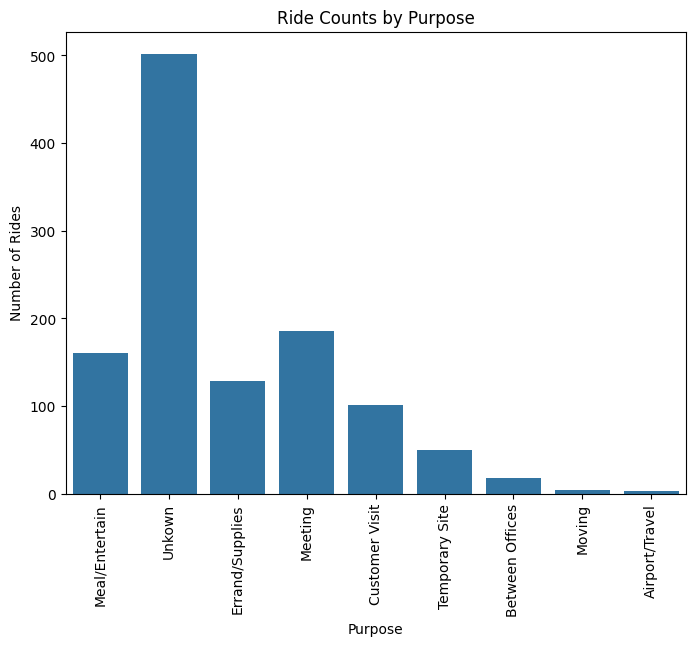

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PURPOSE', data=uber_df)
plt.title('Ride Counts by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Number of Rides')
plt.xticks(rotation = 90)
plt.show()

Unknown Purposes: The high count of "Unknown" purposes suggests a potential area for improvement in data collection or recording. It might be worthwhile to investigate and standardize the recording of ride purposes to enhance the dataset's completeness.

    
Common Purposes: "Meeting," "Meal/Entertain," and "Errand/Supplies" are common ride purposes, indicating that users frequently utilize Uber for work-related meetings, meals, and errands.

    
Less Frequent Purposes: Purposes like "Moving," "Airport/Travel," "Commute," and "Charity" are less common, but still present in the dataset


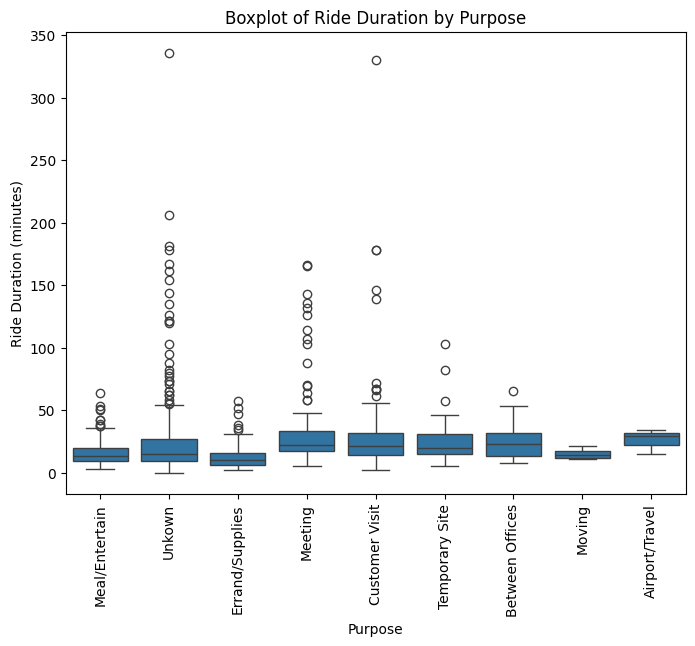

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='PURPOSE', y='DURATION', data=uber_df)
plt.title('Boxplot of Ride Duration by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Ride Duration (minutes)')
plt.xticks(rotation = 90)
plt.show()

There

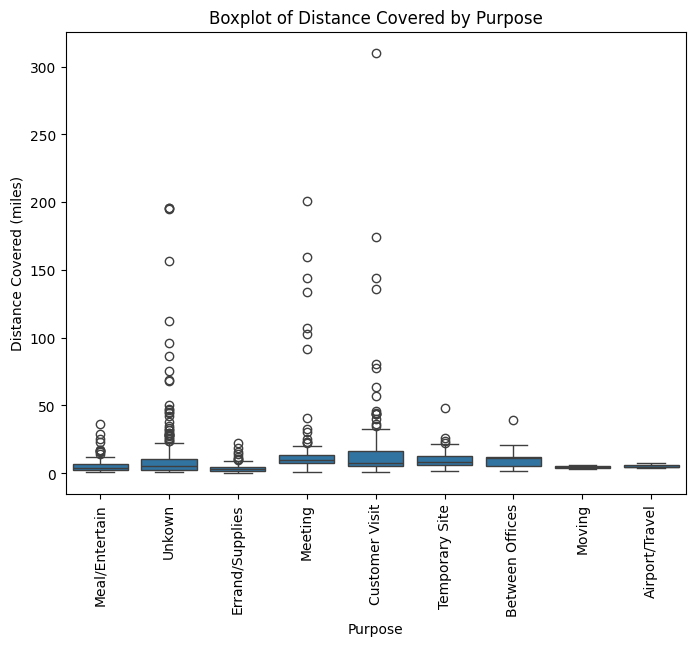

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='PURPOSE', y='MILES', data=uber_df)
plt.title('Boxplot of Distance Covered by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Distance Covered (miles)')
plt.xticks(rotation = 90)
plt.show()

## 3. Analysis based on 'Category'

In [ ]:
category_distribution = uber_df['CATEGORY'].value_counts()
print("Category Distribution:")
print(category_distribution)

Category Distribution:
Business    1077
Personal      75
Name: CATEGORY, dtype: int64


In [ ]:
descriptive_stats_by_category = uber_df.groupby('CATEGORY')['MILES'].describe()

print("Descriptive Statistics on Miles Covered grouped by Category:")
print(descriptive_stats_by_category)

Descriptive Statistics on Miles Covered grouped by Category:
           count       mean        std  min  25%  50%   75%    max
CATEGORY                                                          
Business  1077.0  10.656546  21.621433  0.5  2.9  6.1  10.4  310.3
Personal    75.0   6.965333   7.863626  0.7  1.9  4.2   8.2   41.9


In [ ]:
descriptive_stats_by_category = uber_df.groupby('CATEGORY')['DURATION'].describe()

print("Descriptive Statistics on Trip Duration grouped by Category:")
print(descriptive_stats_by_category)

Descriptive Statistics on Trip Duration grouped by Category:
           count       mean        std  min   25%   50%   75%    max
CATEGORY                                                            
Business  1077.0  23.441040  27.542558  0.0  10.0  17.0  28.0  336.0
Personal    75.0  18.173333  15.075820  4.0   8.0  14.0  21.0   88.0


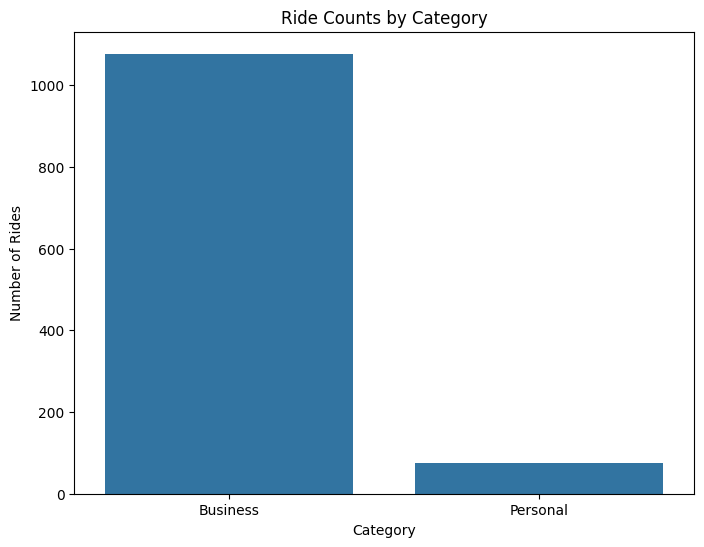

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CATEGORY', data=uber_df)
plt.title('Ride Counts by Category')
plt.xlabel('Category')
plt.ylabel('Number of Rides')
plt.show()

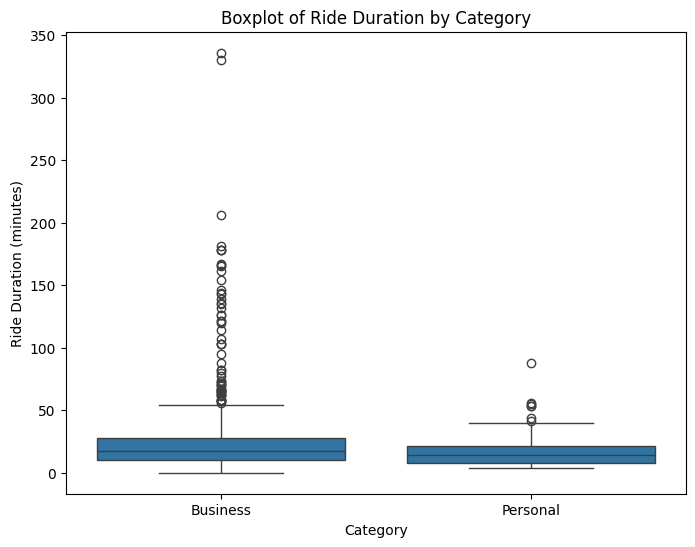

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='CATEGORY', y='DURATION', data=uber_df)
plt.title('Boxplot of Ride Duration by Category')
plt.xlabel('Category')
plt.ylabel('Ride Duration (minutes)')
plt.show()

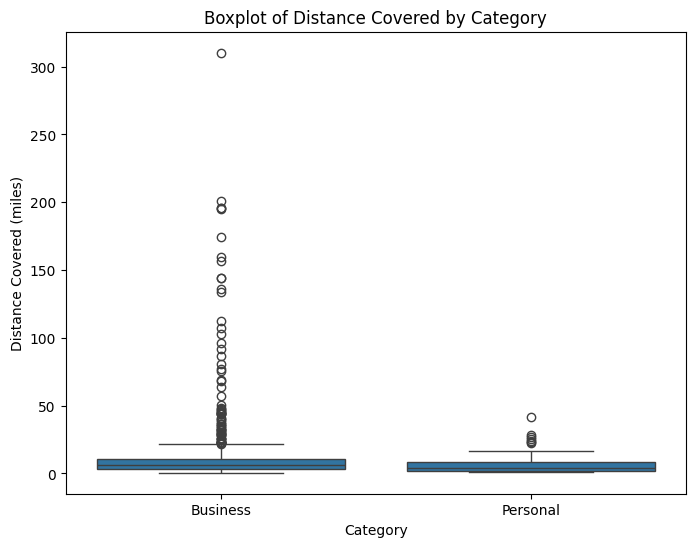

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='CATEGORY', y='MILES', data=uber_df)
plt.title('Boxplot of Distance Covered by Category')
plt.xlabel('Category')
plt.ylabel('Distance Covered (miles)')
plt.show()

## 4. Temporal Analysis

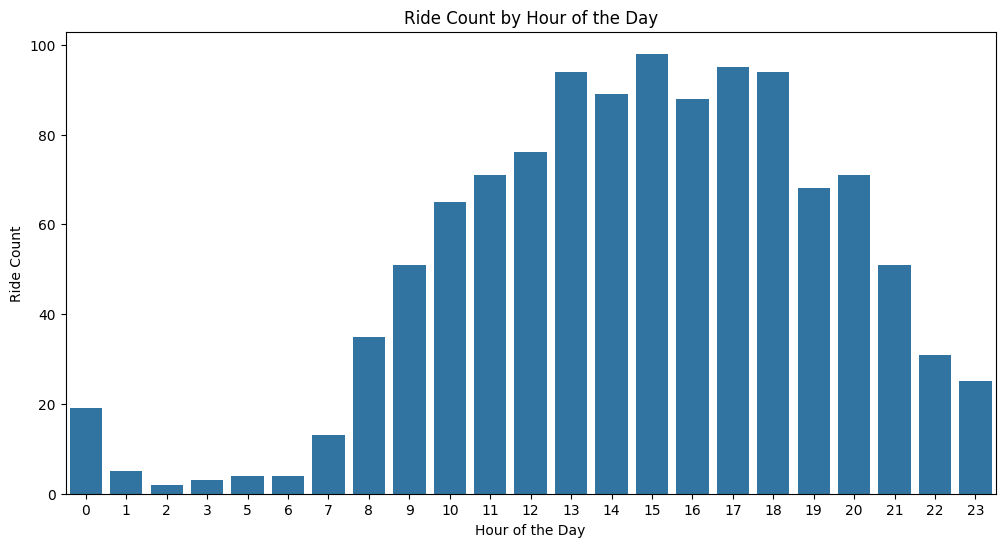

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='START_HOUR', data=uber_df)
plt.title('Ride Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Ride Count')
plt.show()

Text(0, 0.5, 'Ride Count')

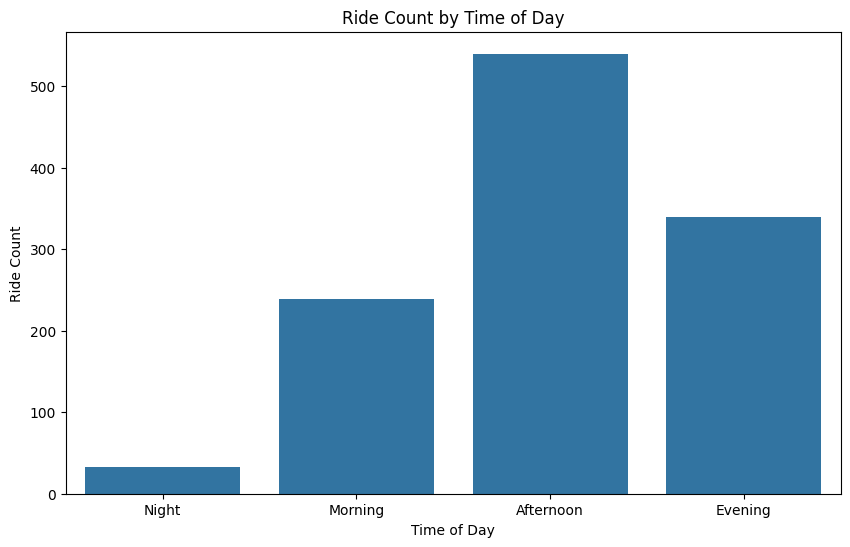

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=uber_df["TimeOfDay"])
plt.title('Ride Count by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Ride Count')

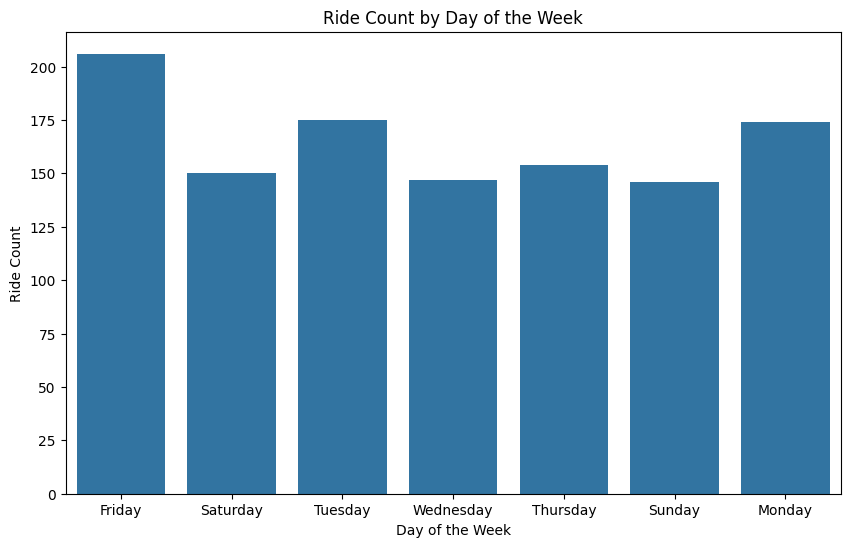

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DAY', data=uber_df)
plt.title('Ride Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Ride Count')
plt.show()

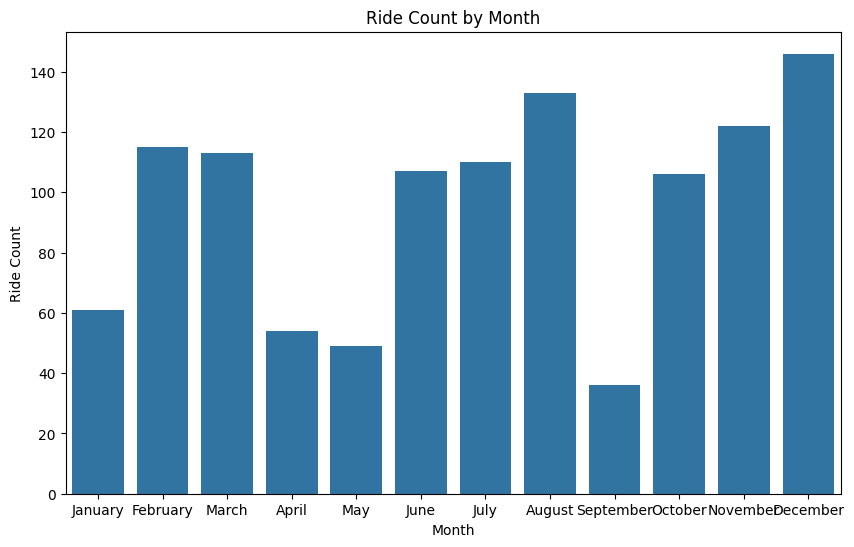

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MONTH', data=uber_df)
plt.title('Ride Count by Month')
plt.xlabel('Month')
plt.ylabel('Ride Count')
plt.show()

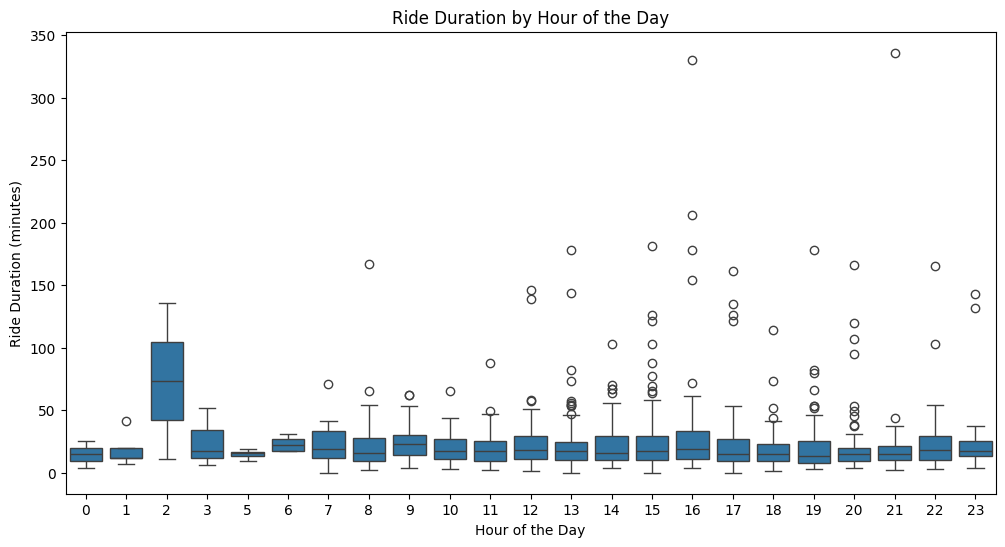

In [ ]:
# Example in Python using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='START_HOUR', y='DURATION', data=uber_df)
plt.title('Ride Duration by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Ride Duration (minutes)')
plt.show()


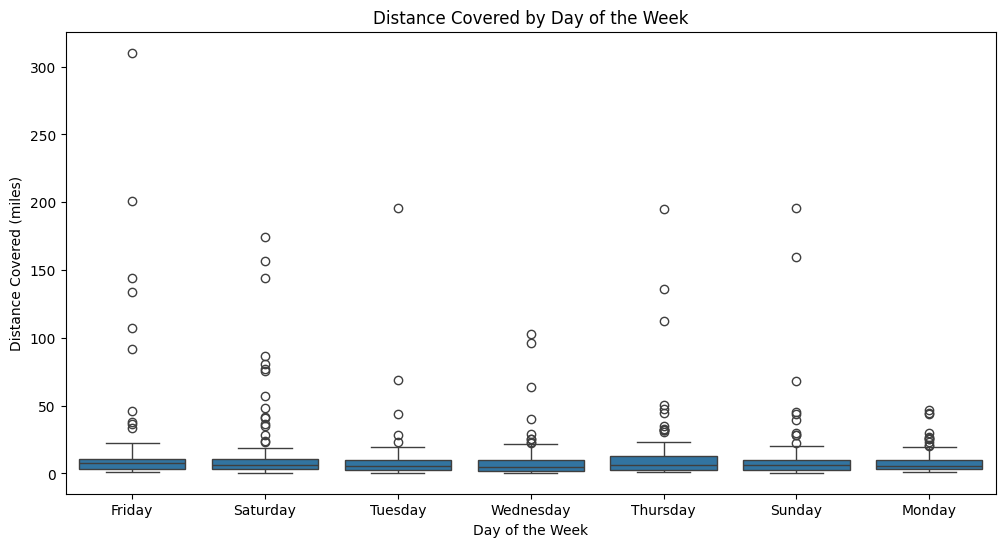

In [ ]:
# Example in Python using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='DAY', y='MILES', data=uber_df)
plt.title('Distance Covered by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Distance Covered (miles)')
plt.show()

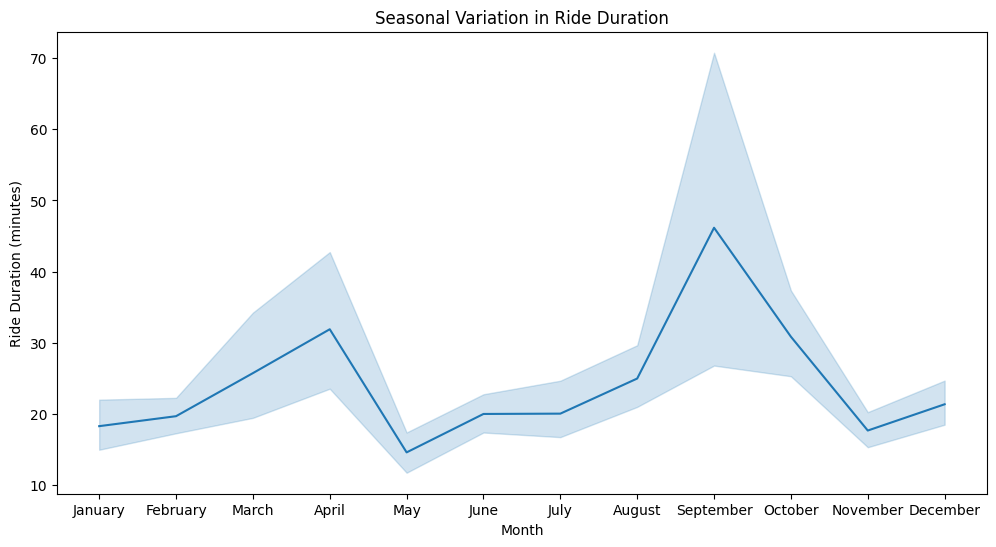

In [ ]:
# Example in Python using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='MONTH', y='DURATION', data=uber_df)
plt.title('Seasonal Variation in Ride Duration')
plt.xlabel('Month')
plt.ylabel('Ride Duration (minutes)')
plt.show()

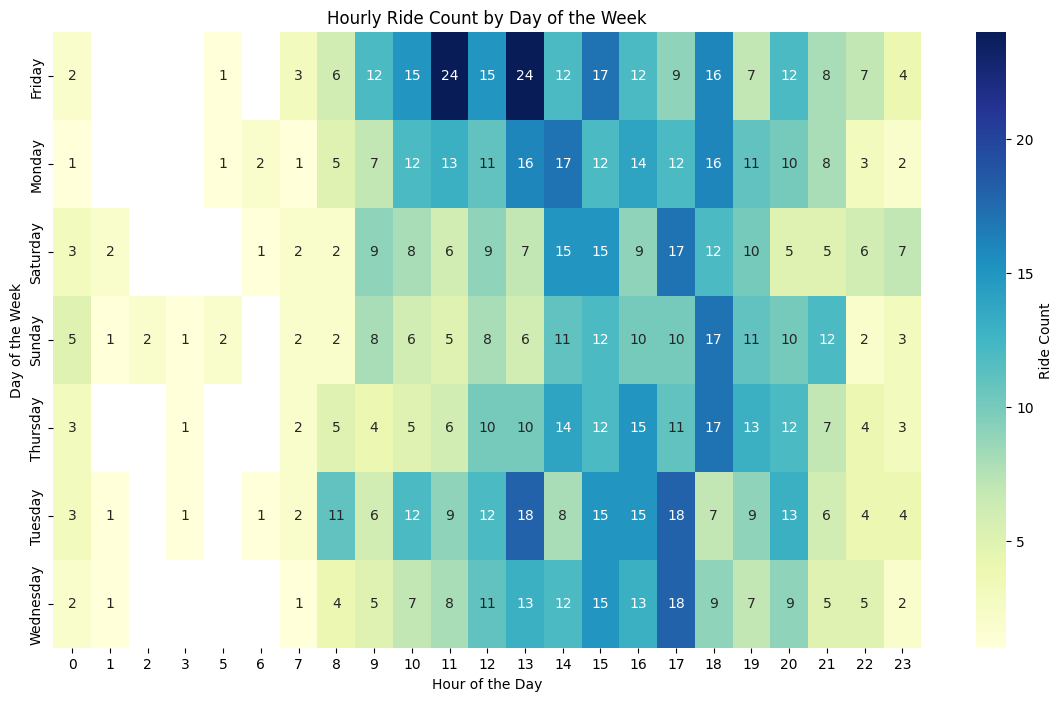

In [ ]:
heatmap_data = uber_df.groupby(['DAY', 'START_HOUR']).size().unstack()
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', cbar_kws={'label': 'Ride Count'})
plt.title('Hourly Ride Count by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

## 5. Identifying Outliers

Text(0.5, 1.0, 'Outliers in Duration')

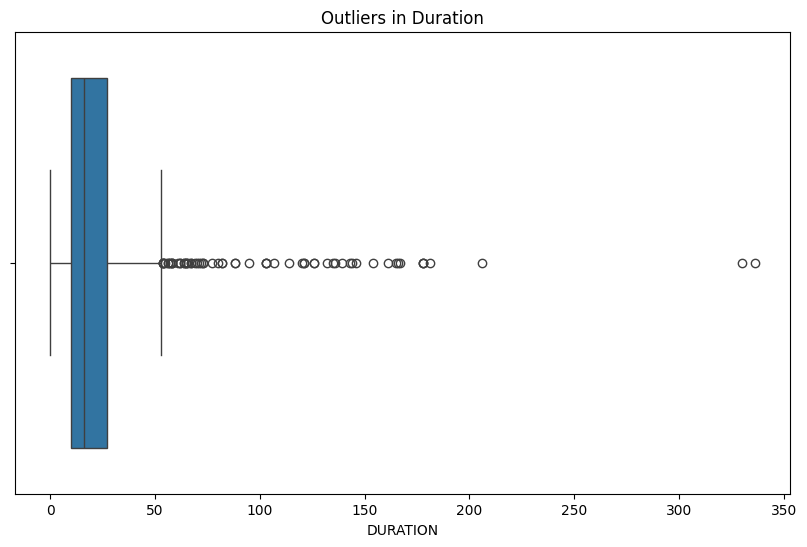

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=uber_df["DURATION"], data = uber_df)
plt.title("Outliers in Duration")

Text(0.5, 1.0, 'Outliers in Miles')

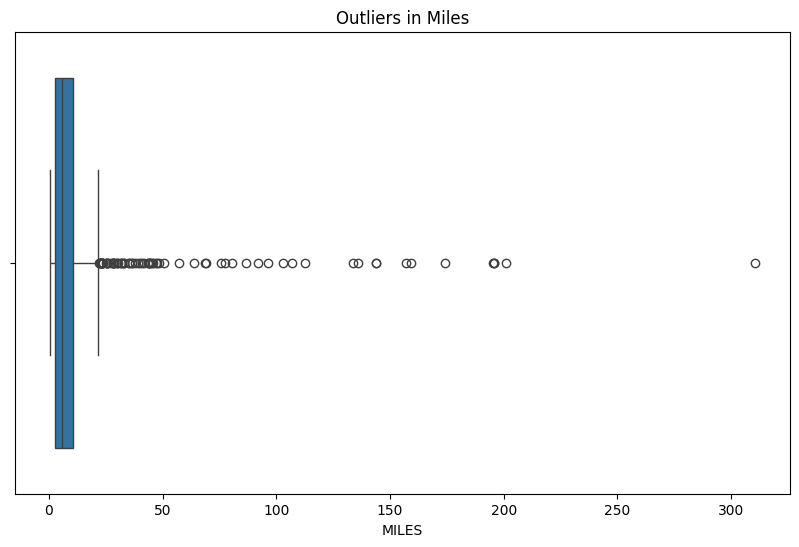

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=uber_df["MILES"], data = uber_df)
plt.title("Outliers in Miles")

## 5. Correlation Analysis

In [ ]:
# Example in Python using pandas
correlation_matrix = uber_df[['MILES', 'DURATION']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             MILES  DURATION
MILES     1.000000  0.837112
DURATION  0.837112  1.000000


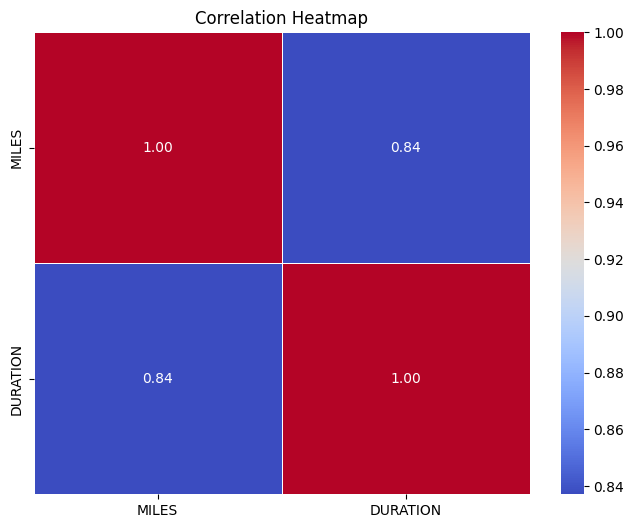

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## 6. Distributions Analysis

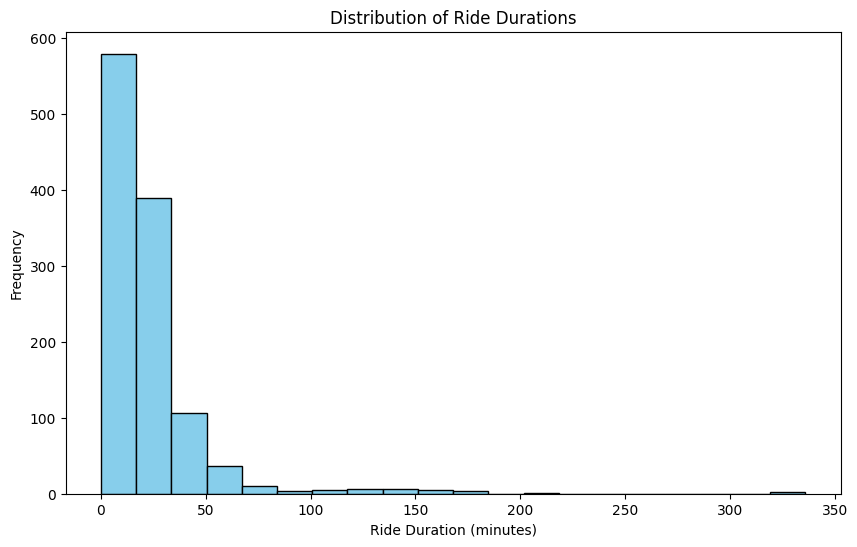

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(uber_df['DURATION'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ride Durations')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

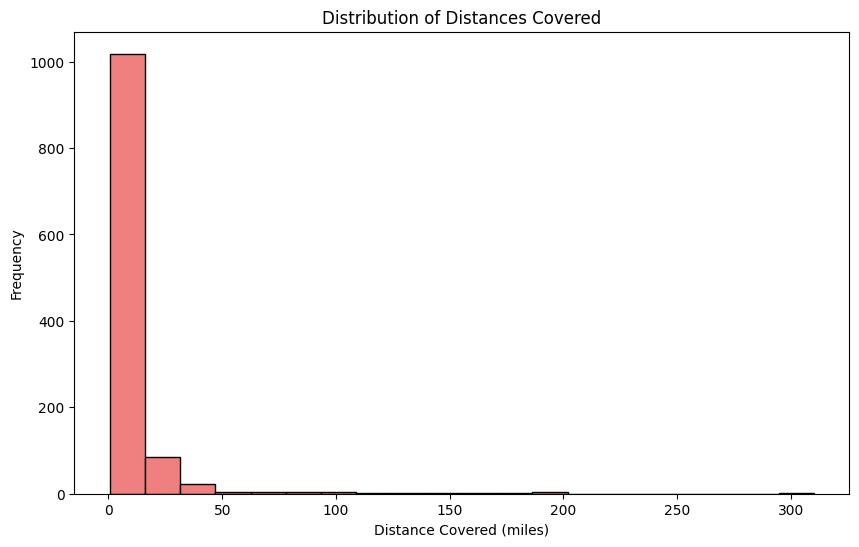

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(uber_df['MILES'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Distances Covered')
plt.xlabel('Distance Covered (miles)')
plt.ylabel('Frequency')
plt.show()

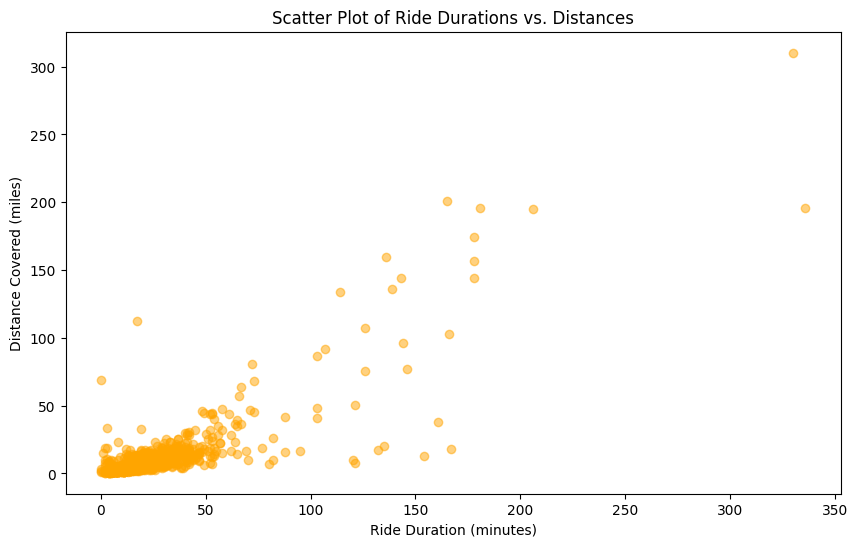

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(uber_df['DURATION'], uber_df['MILES'], alpha=0.5, color='orange')
plt.title('Scatter Plot of Ride Durations vs. Distances')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Distance Covered (miles)')
plt.show()

In [ ]:
#Creating a pivot table with sum of 'MILES' for each 'TimeOfDay' period and 'PURPOSE'
pivot_table = uber_df.pivot_table(index='TimeOfDay', columns = 'PURPOSE', values = 'MILES', aggfunc = 'sum', fill_value = 0)
pivot_table

PURPOSE,Airport/Travel,Between Offices,Customer Visit,Errand/Supplies,Meal/Entertain,Meeting,Moving,Temporary Site,Unkown
TimeOfDay,,,,,,,,,
Night,0.0,12.4,51.9,26.6,29.3,237.3,0.0,0.0,43.2
Morning,7.6,63.2,268.1,62.3,187.6,392.0,18.2,135.3,849.7
Afternoon,8.9,86.7,1348.0,256.7,367.1,1064.5,0.0,229.9,2783.0
Evening,0.0,34.7,421.5,162.4,327.7,1147.6,0.0,158.5,1217.6


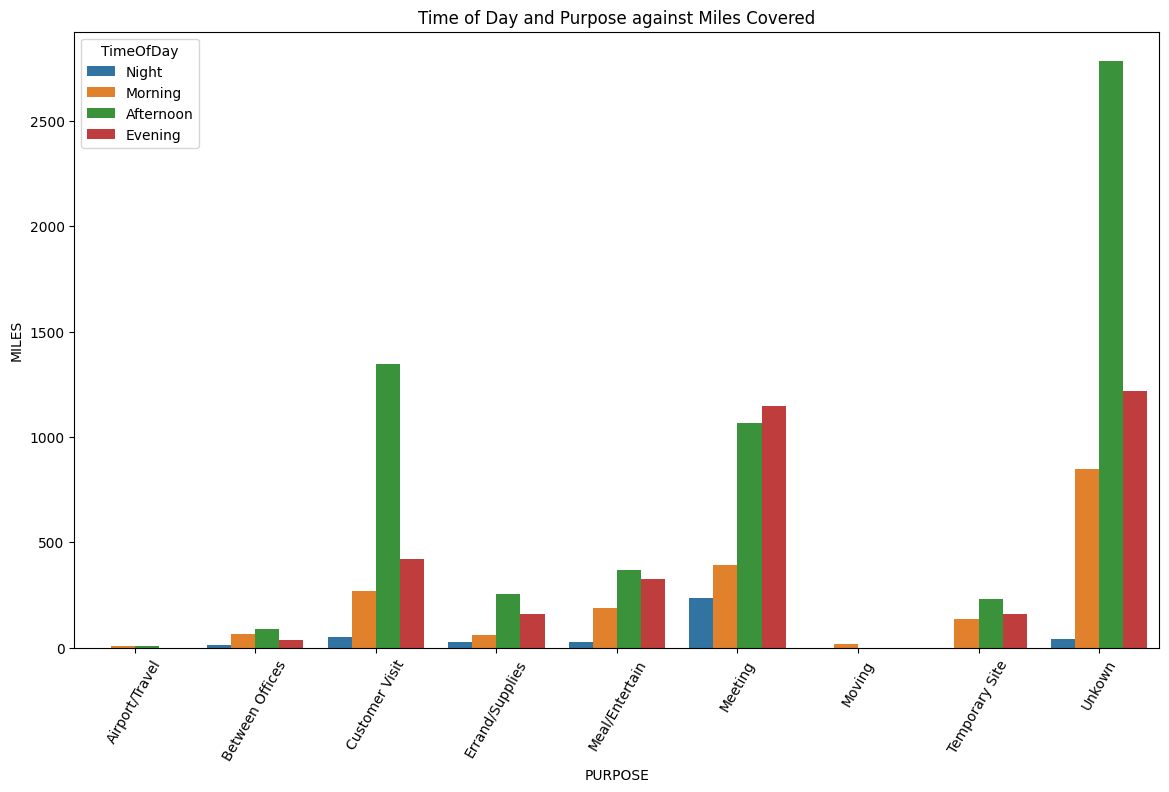

In [ ]:
#Converting the Dictionary to a DataFrame
df_pivot = pd.DataFrame(pivot_table)

#Melting the vizualization to work with Seaborn
df_melted = df_pivot.reset_index().melt(id_vars = 'TimeOfDay', var_name = 'PURPOSE', value_name = 'MILES')

plt.figure(figsize = (14,8))
sns.barplot(x = 'PURPOSE', y = 'MILES', hue = 'TimeOfDay', data = df_melted)
plt.xticks(rotation = 60)
plt.xlabel('PURPOSE')
plt.ylabel('MILES')
plt.legend(title = 'TimeOfDay')
plt.title("Time of Day and Purpose against Miles Covered")

plt.show()

In [ ]:
#Downloading the Cleaned Dataset for Dashboard Creation
#from IPython.display import FileLink, FileLinks
#uber_df.to_excel('C:\\Users\\M\\Downloads\\uber_df_clean.xlsx', index = False)